> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Data Analysis of tmdb Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

In this report a data set from a movie database is going to be analyzed. The data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 

The data set has the following information:

- (popularity): movie popularity score, the higher the score the more popularity of the movie
- (budget): movie budget in dollars
- (revenue): movie revenue in dollars
- (original title): movie title
- (Cast): cast names
- (Genre): Genre of movie
- (runtime): movie period in minutes

The following topics are going to be analyzed:

- Is there a correlation between popularity score and movie budget?
- If there a correlation between movie budget and revenue?
- What are the movie incomes trend throughout years?
- What is the most common actor these movies?
- How vote count changed throughout the years

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [ ]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('tmdb-movies.csv')

In [10]:
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [9]:
df.shape

(10866, 21)

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

From the general properties analysis, the original dataset has 10866 rows and 21 columns of different datatypes (integer,string,object). 
The data requires cleaning:
- Removing unnecessary columns (id,imdb_id,homepage,budget_adj,budget_adj,director,tagline,keywords,overview) as they are not relevant to the topics that are about to be analyzed.
- Removing NaN rows, the following columns of relevance have NaN values (genres,cast) 
- remove release_date data as the year is only of importance and it is already in the data set

In [11]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['id','imdb_id','homepage','director','tagline','keywords','overview','production_companies','release_date','budget_adj','revenue_adj'], axis=1, inplace=True)

In [12]:
df.head(2)

,popularity,budget,revenue,original_title,cast,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015


In [14]:
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [15]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
cast              0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Correlation between variables)

In [19]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df['income']=df['revenue']-df['budget']
df.corr()['income']['popularity']

0.6287844720308811

There is a positive correlation between income and popularity of 0.63 . It is high since it is larger than 0.5. It means as popularity increased the income increases. 

In [21]:
df.corr()['budget']['revenue']

0.7345803435581342

There is a positive correlation between budget and revenue of 0.73 . It is high since it is larger than 0.5. It means as more budget is made on the movie, more revenue is expected. 

### Research Question 2  (change of income and vote count with year)

In [24]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
vote=df.groupby('release_year')['vote_count'].mean()

In [25]:
vote

release_year
1960     77.531250
1961     77.580645
1962     74.750000
1963     82.823529
1964     74.690476
1965     52.000000
1966     31.739130
1967     79.128205
1968    110.657895
1969     57.366667
1970     50.025000
1971     92.381818
1972    135.825000
1973     94.054545
1974    112.956522
1975    138.363636
1976    100.425532
1977    143.232143
1978     75.353846
1979    154.912281
1980    139.717949
1981     91.219512
1982    140.555556
1983    123.575000
1984    147.490385
1985    126.247706
1986    113.283333
1987    121.129032
1988    101.964789
1989    137.555556
1990    163.446970
1991    127.864662
1992    146.651515
1993    136.426966
1994    204.298913
1995    205.551724
1996    128.162562
1997    214.523560
1998    190.676190
1999    238.602679
2000    206.080357
2001    261.601660
2002    238.140152
2003    243.505338
2004    257.980456
2005    202.750693
2006    187.841584
2007    207.441379
2008    208.243902
2009    226.393939
2010    269.167702
2011    254.295113

In [26]:
income=df.groupby('release_year')['income'].mean()

In [35]:
income

release_year
1960    3.842127e+06
1961    9.405909e+06
1962    5.026804e+06
1963    3.355103e+06
1964    7.178539e+06
1965    1.108219e+07
1966    5.909106e+05
1967    1.633802e+07
1968    5.073526e+06
1969    6.727600e+06
1970    1.083150e+07
1971    5.980247e+06
1972    1.146127e+07
1973    2.106891e+07
1974    1.599065e+07
1975    2.048207e+07
1976    1.444374e+07
1977    3.605363e+07
1978    1.785819e+07
1979    2.508738e+07
1980    1.802772e+07
1981    1.708352e+07
1982    2.494628e+07
1983    2.235527e+07
1984    1.832993e+07
1985    1.951424e+07
1986    1.915204e+07
1987    2.219878e+07
1988    1.983179e+07
1989    3.026124e+07
1990    3.049428e+07
1991    2.436366e+07
1992    3.515445e+07
1993    2.907597e+07
1994    2.644686e+07
1995    3.615205e+07
1996    2.278054e+07
1997    3.091145e+07
1998    2.377864e+07
1999    2.495749e+07
2000    2.333036e+07
2001    3.223294e+07
2002    3.315138e+07
2003    3.166685e+07
2004    3.134685e+07
2005    2.541150e+07
2006    2.220756e+07


df.groupby('release_year')['income'].mean().plot(x='release_year', y='vote_count', kind='bar');

In [44]:
df.head()

,popularity,budget,revenue,original_title,cast,runtime,genres,vote_count,vote_average,income
release_year,,,,,,,,,,
2015,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,1363528810
2015,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,228436354
2015,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2480,6.3,185238201
2015,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,1868178225
2015,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2947,7.3,1316249360


In [46]:
df.sort_index(inplace=True)

In [51]:
df.reset_index(inplace=True)

<AxesSubplot:xlabel='release_year', ylabel='No of Votes'>

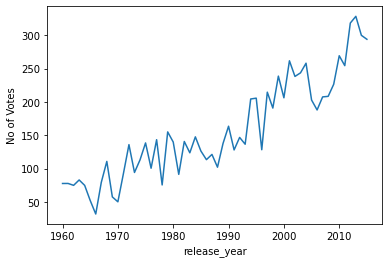

In [55]:
df.groupby('release_year')['vote_count'].mean().plot(ylabel='No of Votes')

<AxesSubplot:xlabel='release_year', ylabel='Income of movie ($)'>

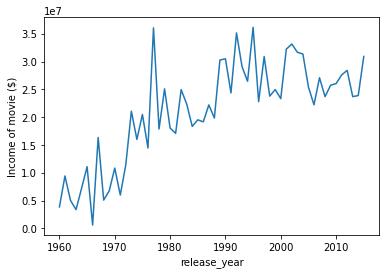

In [75]:
df.groupby('release_year')['income'].mean().plot(ylabel='Income of movie ($)')

As seen from the graphs, both number of votes and income of movies have been increased throughout years. this may be due to the technological advancements throughout the years which made people have more access to vote. Also the income has increased may be because of the sponsors that is more now than the past.  

### Research Question 3  (Distributions of Data Variables)

In [59]:
df.groupby(['release_year', 'genres']).apply(pd.DataFrame.mode).reset_index(drop=True)

,release_year,popularity,budget,revenue,original_title,cast,runtime,genres,vote_count,vote_average,income
0,1960.0,0.310398,0.0,0.0,The Alamo,John Wayne|Richard Widmark|Laurence Harvey|Fra...,167.0,Action|Adventure|Drama|History|Western,27.0,6.2,0.0
1,1960.0,1.872132,2000000.0,4905000.0,The Magnificent Seven,Yul Brynner|Eli Wallach|Steve McQueen|Charles ...,128.0,Action|Adventure|Western,224.0,7.0,2905000.0
2,1960.0,0.194948,0.0,0.0,Sink the Bismarck!,Kenneth More|Dana Wynter|Carl MÃ¶hner|Laurence...,97.0,Action|Drama|Foreign|History|War,12.0,4.9,0.0
3,1960.0,1.136943,12000000.0,60000000.0,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,197.0,Action|Drama|History,211.0,6.9,48000000.0
4,1960.0,0.256779,0.0,0.0,Exodus,Paul Newman|Eva Marie Saint|Lee J. Cobb|Ralph ...,208.0,Action|Drama|History|War,14.0,6.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
10762,2015.0,0.356519,0.0,0.0,War Pigs,Luke Goss|Dolph Lundgren|Chuck Liddell|Noah Se...,92.0,War|Action,26.0,4.9,0.0
10763,2015.0,5.476958,160000000.0,650523427.0,The Hunger Games: Mockingjay - Part 2,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,136.0,War|Adventure|Science Fiction,2380.0,6.5,490523427.0
10764,2015.0,0.561032,0.0,0.0,Hyena Road,Paul Gross|Rossif Sutherland|Clark Johnson|All...,120.0,War|Drama,29.0,5.7,0.0
10765,2015.0,0.747541,11000000.0,0.0,Forsaken,Demi Moore|Kiefer Sutherland|Donald Sutherland...,90.0,Western|Drama,53.0,5.6,-11000000.0


array([[<AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'runtime'}>, <AxesSubplot:>]],
      dtype=object)

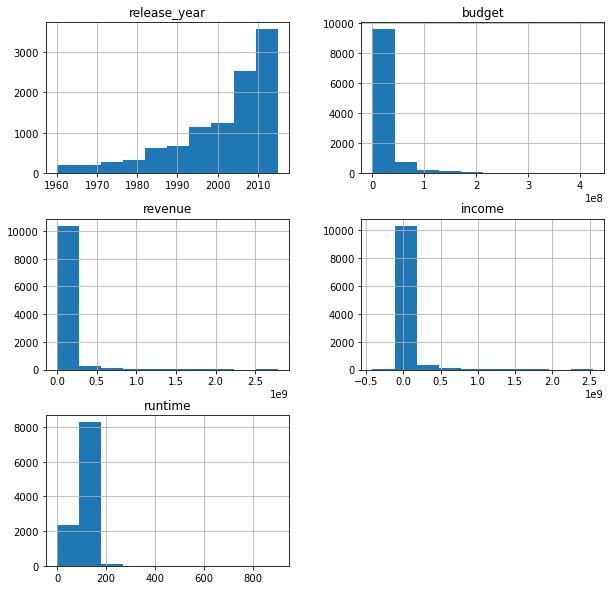

In [74]:
df[['release_year','budget','revenue','income','runtime']].hist(figsize=(10,10))

As observed from the histogram plots of each variable:
- Release Year: Most movies are 20th century
- Budget, revenue,and income: minority of movies have relatively very high budgets,revenues and incomes
- Runtime: Most movies have runtime less than 200 minutes.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

Three major points have been analyzed in this report:
- Correlation between variables
- Change of variables over years
- Distributions of Data Variables

The data cannot be relied on when it comes to comparing the movies nowadays and 19th century because most movies in this data set are in 20th century. So it can be used when comparing the movies only in 20th century. 

Also the income is not an accurate way to measure the movie's success because of inflation throughout years.
